In [248]:
import subprocess as sub
import os

import time

import matplotlib.pyplot as plt
import math

In [249]:
ALGORITHMS = ['random_select', 'select']

N_VALUES = list(range(100, 10100, 100))
REPEATS = 100

K_CALCULATING = [
    (lambda n: 1, 'k = 1'),
    (lambda n: n, 'k = n'),
    (lambda n: n // 2, 'k = n // 2'),
    (lambda n: int(0.3 * n), 'int(0.3 * n)'),
    (lambda n: int(0.7 * n), 'int(0.7 * n)')
]

M_VALUES = [3, 5, 7, 9]

In [250]:
def random_select_unit_test(data_type, n, k_calculating):
    comparisons_data = []
    swaps_data = []
    times_data = []

    out = sub.run('./data_generator {} {}'.format(data_type, n), shell=True, capture_output=True, encoding='utf-8')
    with open('tmp.txt', 'w') as tmp_file:
        tmp_file.write(out.stdout)

    for k_calc in k_calculating:
        comparisons_sum = 0
        swaps_sum = 0
        start_exp = time.time()
        for _ in range(REPEATS):
            out = sub.run('cat tmp.txt | ./random_select {}'.format(k_calc[0](n)), shell=True, capture_output=True, encoding='utf-8')
            out_result = out.stdout.split(' ')

            if len(out_result) < 3:
                continue   

            success = bool(out_result[0])
            comparisons = int(out_result[1])
            swaps = int(out_result[2])

            comparisons_sum += comparisons
            swaps_sum += swaps

        end_exp = time.time()

        comparisons_data.append(comparisons_sum / REPEATS)
        swaps_data.append(swaps_sum / REPEATS)
        times_data.append((end_exp - start_exp) / REPEATS * 1000)

    return comparisons_data, swaps_data, times_data

In [251]:
def select_unit_test(data_type, n, m, k_calculating):
    comparisons_data = []
    swaps_data = []
    times_data = []

    out = sub.run('./data_generator {} {}'.format(data_type, n), shell=True, capture_output=True, encoding='utf-8')
    with open('tmp.txt', 'w') as tmp_file:
        tmp_file.write(out.stdout)

    for k_calc in k_calculating:
        comparisons_sum = 0
        swaps_sum = 0
        start_exp = time.time()
        for _ in range(REPEATS):
            out = sub.run('cat tmp.txt | ./select {} {}'.format(k_calc[0](n), m), shell=True, capture_output=True, encoding='utf-8')
            out_result = out.stdout.split(' ')

            if len(out_result) < 3:
                continue   

            success = bool(out_result[0])
            comparisons = int(out_result[1])
            swaps = int(out_result[2])

            comparisons_sum += comparisons
            swaps_sum += swaps

        end_exp = time.time()

        comparisons_data.append(comparisons_sum / REPEATS)
        swaps_data.append(swaps_sum / REPEATS)
        times_data.append((end_exp - start_exp) / REPEATS * 1000)

    return comparisons_data, swaps_data, times_data

In [274]:
colors = ('r', 'g', 'b', 'y', 'm')

def visualise_select_stats(data, n_values, title):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(title)
    ax1.set_xlabel('n')
    ax1.set_title('Comparision Number')
    ax2.set_xlabel('n')
    ax2.set_title('Swaps Number')
    ax3.set_xlabel('n')
    ax3.set_title('Time [millis]')

    lines = []
    labels = []

    for k in range(len(K_CALCULATING)):
        comparisions = []
        swaps = []
        times = []
        for n, calculations in zip(n_values, data):
            comparisions.append(calculations[0][k] / n)
            swaps.append(calculations[1][k] / n)
            times.append(calculations[2][k] / n)

        label1 = ax1.plot(n_values, comparisions, color=colors[k])
        label2 = ax2.plot(n_values, swaps, color=colors[k])
        label3 = ax3.plot(n_values, times, color=colors[k])

        lines.append(label1)
        labels.append(K_CALCULATING[k][1])

    fig.legend(lines, labels=labels, loc='upper right', bbox_to_anchor = (1.0, 0.6))

In [254]:
random_select_data = []
for n in N_VALUES:
    random_select_data.append(random_select_unit_test('r', n, K_CALCULATING))

KeyboardInterrupt: 

In [ ]:
visualise_select_stats(
    random_select_data, 
    N_VALUES, 
    'Random Selects Comparison (random data;  reps = {};  {} < n < {})'.format(REPEATS, N_VALUES[0], N_VALUES[-1]))

In [270]:
select_data = []
for n in N_VALUES:
    select_data.append(select_unit_test('r', n, 7, K_CALCULATING))

/tmp/ipykernel_842664/2440781522.py:32: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(lines, labels=labels, loc='upper right', bbox_to_anchor = (1.0, 0.6))


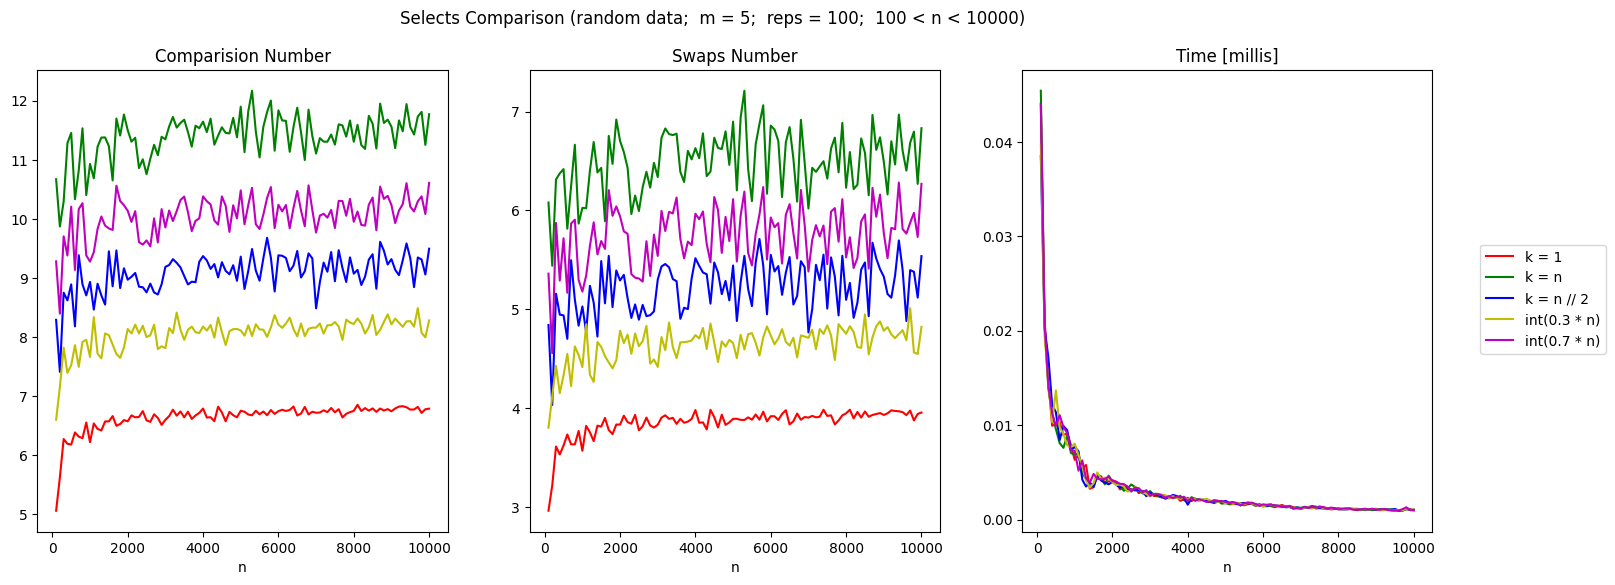

In [275]:
visualise_select_stats(
    select_data, 
    N_VALUES, 
    'Selects Comparison (random data;  m = {};  reps = {};  {} < n < {})'.format(5, REPEATS, N_VALUES[0], N_VALUES[-1]))

In [257]:
select_m_choosing = {}

for m in M_VALUES:
    select_m_choosing[m] = []
    for n in N_VALUES:
        select_m_choosing[m].append(select_unit_test('r', n, m, [K_CALCULATING[2]]))

In [259]:
print(select_m_choosing[3])

[([1389.0], [981.0], [5.490679740905762]), ([2583.0], [1751.0], [4.655747413635254]), ([4406.0], [3013.0], [5.4181718826293945]), ([6077.0], [4162.0], [5.434865951538086]), ([8232.0], [5650.0], [5.1236677169799805]), ([9852.0], [6650.0], [4.917449951171875]), ([11528.0], [7830.0], [5.456206798553467]), ([14680.0], [9873.0], [5.351324081420898]), ([16123.0], [10805.0], [4.55510139465332]), ([19273.0], [13200.0], [5.1644062995910645]), ([22524.0], [15161.0], [5.46473503112793]), ([22476.0], [15289.0], [4.80233907699585]), ([27076.0], [18215.0], [5.4175496101379395]), ([28393.0], [19274.0], [5.576457977294922]), ([32622.0], [22026.0], [5.566167831420898]), ([35523.0], [24053.0], [5.845353603363037]), ([34200.0], [23052.0], [5.448257923126221]), ([40191.0], [27149.0], [5.653657913208008]), ([34595.0], [23399.0], [5.443308353424072]), ([46790.0], [31642.0], [6.594839096069336]), ([46626.0], [31316.0], [6.504919528961182]), ([50384.0], [33863.0], [6.857345104217529]), ([51512.0], [34740.0], 

In [266]:
def visualise_m_choosing(data, n_values, title):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(title)
    ax1.set_xlabel('n')
    ax1.set_title('Comparision Number')
    ax2.set_xlabel('n')
    ax2.set_title('Swaps Number')
    ax3.set_xlabel('n')
    ax3.set_title('Time [millis]')

    lines = []
    labels = []

    for i, m in enumerate(M_VALUES):
        comparisions = []
        swaps = []
        times = []
        for n, calculations in zip(n_values, data[m]):
            comparisions.append(calculations[0][0] / n)
            swaps.append(calculations[1][0] / n)
            times.append(calculations[2][0] / n)

        label1 = ax1.plot(n_values, comparisions, color=colors[i])
        label2 = ax2.plot(n_values, swaps, color=colors[i])
        label3 = ax3.plot(n_values, times, color=colors[i])

        lines.append(label1)
        labels.append('m = ' + str(m))

    fig.legend(lines, labels=labels, loc='upper right', bbox_to_anchor = (1.0, 0.6))

/tmp/ipykernel_842664/3571788078.py:30: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(lines, labels=labels, loc='upper right', bbox_to_anchor = (1.0, 0.6))


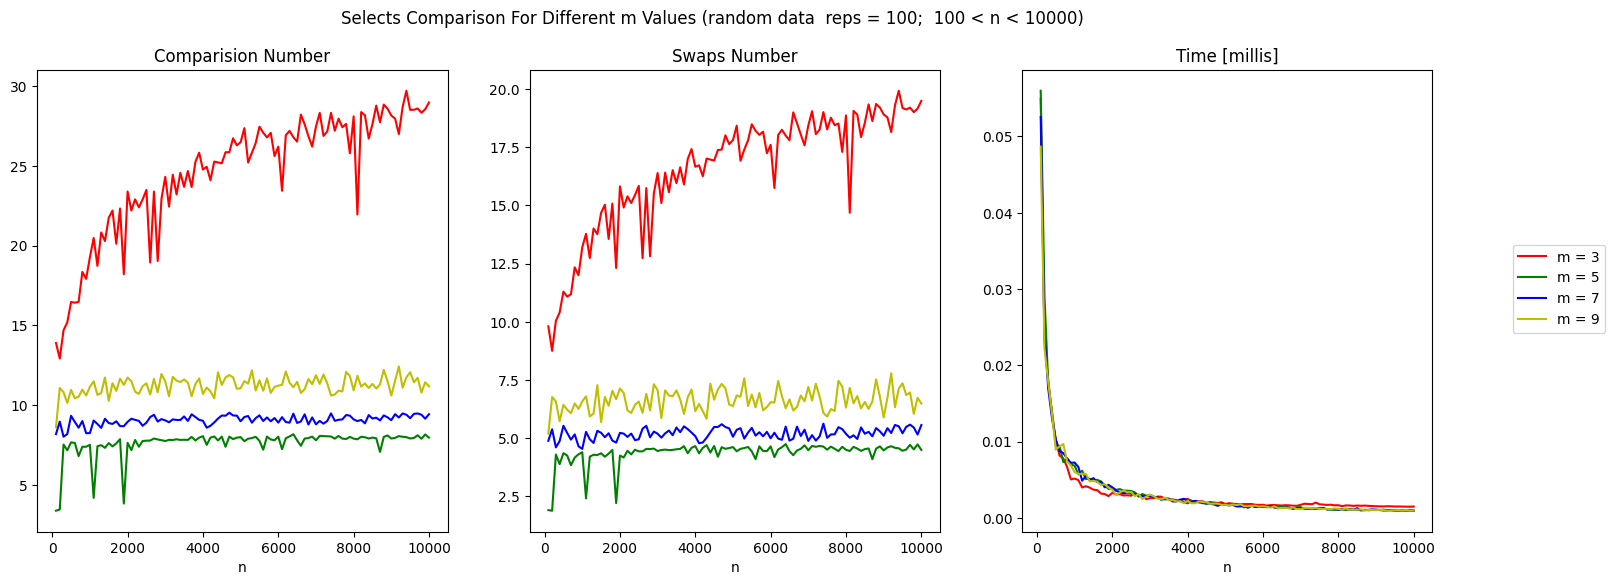

In [268]:
visualise_m_choosing(
    select_m_choosing, 
    N_VALUES,
    'Selects Comparison For Different m Values (random data  reps = {};  {} < n < {})'.format(REPEATS, N_VALUES[0], N_VALUES[-1]))